In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
def my_final_layer_activation(x):
    return F.softmax(x, dim = 1)

device = "cuda"
# criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.10371666666666667


0.10371666666666667

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
#         loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:35, 84.30it/s]
9it [00:00, 87.11it/s]

Epoch : 1, Train Accuracy : 0.9718666666666667, Test Accuracy : 0.966


3000it [00:32, 91.76it/s]
9it [00:00, 84.08it/s]

Epoch : 2, Train Accuracy : 0.9789166666666667, Test Accuracy : 0.9709


3000it [00:33, 89.38it/s]
9it [00:00, 88.30it/s]

Epoch : 3, Train Accuracy : 0.9910666666666667, Test Accuracy : 0.9805


3000it [00:34, 87.41it/s]
9it [00:00, 89.55it/s]

Epoch : 4, Train Accuracy : 0.9920166666666667, Test Accuracy : 0.9791


3000it [00:34, 86.88it/s]
10it [00:00, 93.48it/s]

Epoch : 5, Train Accuracy : 0.99475, Test Accuracy : 0.9819


3000it [00:34, 87.76it/s]
10it [00:00, 97.12it/s]

Epoch : 6, Train Accuracy : 0.99525, Test Accuracy : 0.9806


3000it [00:33, 88.50it/s]
9it [00:00, 83.87it/s]

Epoch : 7, Train Accuracy : 0.9974333333333333, Test Accuracy : 0.9821


3000it [00:36, 81.45it/s]
9it [00:00, 89.56it/s]

Epoch : 8, Train Accuracy : 0.9945833333333334, Test Accuracy : 0.9781


3000it [00:33, 88.81it/s]
9it [00:00, 89.52it/s]

Epoch : 9, Train Accuracy : 0.9965666666666667, Test Accuracy : 0.9796


3000it [00:34, 86.15it/s]
9it [00:00, 88.49it/s]

Epoch : 10, Train Accuracy : 0.9965833333333334, Test Accuracy : 0.9807


3000it [00:35, 84.96it/s]
9it [00:00, 89.60it/s]

Epoch : 11, Train Accuracy : 0.9982666666666666, Test Accuracy : 0.9822


3000it [00:35, 84.04it/s]
7it [00:00, 67.29it/s]

Epoch : 12, Train Accuracy : 0.9980166666666667, Test Accuracy : 0.9826


3000it [00:22, 131.77it/s]
14it [00:00, 137.32it/s]

Epoch : 13, Train Accuracy : 0.9937666666666667, Test Accuracy : 0.9772


3000it [00:21, 137.78it/s]
15it [00:00, 146.97it/s]

Epoch : 14, Train Accuracy : 0.99835, Test Accuracy : 0.9816


3000it [00:21, 139.33it/s]
13it [00:00, 128.56it/s]

Epoch : 15, Train Accuracy : 0.9969666666666667, Test Accuracy : 0.9813


3000it [00:21, 137.28it/s]
13it [00:00, 129.83it/s]

Epoch : 16, Train Accuracy : 0.9978666666666667, Test Accuracy : 0.9813


3000it [00:22, 134.13it/s]
13it [00:00, 129.80it/s]

Epoch : 17, Train Accuracy : 0.9970833333333333, Test Accuracy : 0.9793


3000it [00:22, 130.49it/s]
15it [00:00, 135.84it/s]

Epoch : 18, Train Accuracy : 0.9964833333333334, Test Accuracy : 0.9771


3000it [00:22, 130.55it/s]
16it [00:00, 153.82it/s]

Epoch : 19, Train Accuracy : 0.9986666666666667, Test Accuracy : 0.9819


3000it [00:22, 133.40it/s]


Epoch : 20, Train Accuracy : 0.99885, Test Accuracy : 0.9819


In [7]:
my_final_layer_activation(y_hat).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000], device='cuda:0', grad_fn=<SumBackward1>)

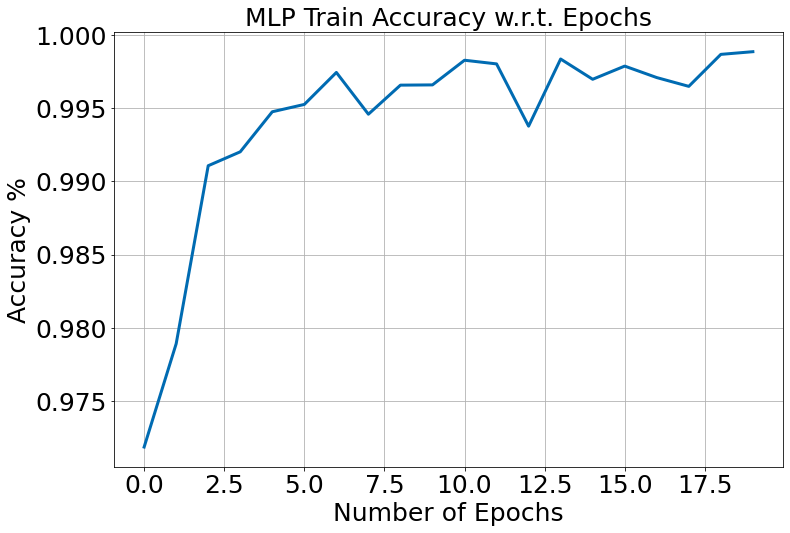

In [8]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

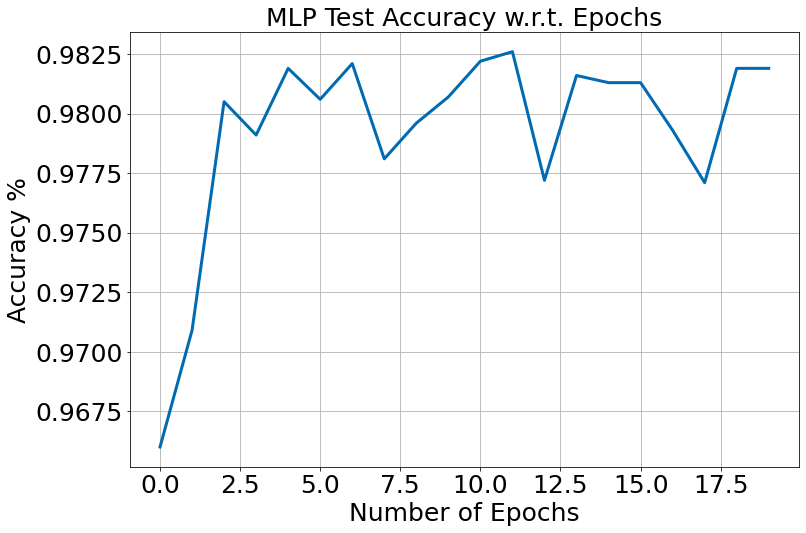

In [9]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)